In [ ]:
import pandas as pd
data = {'max_temp': []}
output = pd.DataFrame(data)

In [ ]:
df = pd.read_csv(r'/content/NYC.csv')

In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "rain", "snowfall", "wind_speed_10m", "wind_gusts_10m"],
	"daily": "temperature_2m_max",
	"start_date": "2024-04-04",
	"end_date": "2024-04-04"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
hourly_rain = hourly.Variables(3).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(4).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(5).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(6).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_max"] = daily_temperature_2m_max

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                        date  temperature_2m  relative_humidity_2m  \
0  2024-04-04 00:00:00+00:00       10.045500                  89.0   
1  2024-04-04 01:00:00+00:00        9.945499                  88.0   
2  2024-04-04 02:00:00+00:00        9.695499                  90.0   
3  2024-04-04 03:00:00+00:00        9.745500                  93.0   
4  2024-04-04 04:00:00+00:00        9.295500                  94.0   
5  2024-04-04 05:00:00+00:00        9.045500                  91.0   
6  2024-04-04 06:00:00+00:00        9.395500                  90.0   
7  2024-04-04 07:00:00+00:00       10.745500                  83.0   
8  2024-04-04 08:00:00+00:00       12.145500                  73.0   
9  2024-04-04 09:00:00+00:00       13.695499                  63.0   
10 2024-04-04 10:00:00+00:00       13.445499                  67.0   
11 2024-04-04 11:00:00+00:00      

In [ ]:
hourly_dataframe.drop(columns=['date'],inplace=True)

In [ ]:
print(df)

                            date  temperature_2m  relative_humidity_2m  \
0      2014-01-01 00:00:00+00:00         -1.6165             51.109135   
1      2014-01-01 01:00:00+00:00         -2.2665             49.321950   
2      2014-01-01 02:00:00+00:00         -2.8165             47.412094   
3      2014-01-01 03:00:00+00:00         -3.3165             45.383360   
4      2014-01-01 04:00:00+00:00         -3.7665             43.611240   
...                          ...             ...                   ...   
87667  2024-01-01 19:00:00+00:00          7.2725             58.516983   
87668  2024-01-01 20:00:00+00:00          7.1225             57.632763   
87669  2024-01-01 21:00:00+00:00          6.7725             59.032120   
87670  2024-01-01 22:00:00+00:00          4.6225             72.084540   
87671  2024-01-01 23:00:00+00:00          3.1225             79.229690   

       dew_point_2m  precipitation  rain  snowfall  wind_speed_10m  \
0        -10.416500            0.0   0.0 

In [ ]:
print(df.columns)

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'rain', 'snowfall', 'wind_speed_10m',
       'wind_gusts_10m'],
      dtype='object')


In [ ]:
df.drop(columns=['date'],inplace=True)

In [ ]:
df

,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,wind_speed_10m,wind_gusts_10m
0,-1.6165,51.109135,-10.416500,0.0,0.0,0.0,16.215992,34.200000
1,-2.2665,49.321950,-11.466499,0.0,0.0,0.0,14.764389,34.200000
2,-2.8165,47.412094,-12.466499,0.0,0.0,0.0,14.759999,31.680000
3,-3.3165,45.383360,-13.466499,0.0,0.0,0.0,14.777550,29.160000
4,-3.7665,43.611240,-14.366501,0.0,0.0,0.0,15.038350,29.519999
...,...,...,...,...,...,...,...,...
87667,7.2725,58.516983,-0.327500,0.0,0.0,0.0,8.557102,18.720000
87668,7.1225,57.632763,-0.677500,0.0,0.0,0.0,8.891344,16.919998
87669,6.7725,59.032120,-0.677500,0.0,0.0,0.0,7.968939,15.840000
87670,4.6225,72.084540,0.022500,0.0,0.0,0.0,6.830519,12.240000


In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


X = df[['relative_humidity_2m', 'precipitation', 'rain', 'snowfall', 'wind_speed_10m', 'wind_gusts_10m']]
y = df['temperature_2m']

X = pd.DataFrame(X, columns=['relative_humidity_2m', 'precipitation', 'rain', 'snowfall', 'wind_speed_10m', 'wind_gusts_10m'])
y = pd.DataFrame(y, columns=['temperature_2m'])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


model_lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)
mse_lstm = model_lstm.evaluate(X_test, y_test)
print("Mean Squared Error (LSTM):", mse_lstm)


Epoch 1/30
2192/2192 [==============================] - 15s 4ms/step - loss: 0.0339
Epoch 2/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0285
Epoch 3/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0283
Epoch 4/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0282
Epoch 5/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0281
Epoch 6/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0279
Epoch 7/30
2192/2192 [==============================] - 8s 3ms/step - loss: 0.0278
Epoch 8/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0278
Epoch 9/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0277
Epoch 10/30
2192/2192 [==============================] - 7s 3ms/step - loss: 0.0277
Epoch 11/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0276
Epoch 12/30
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0276


In [ ]:
import numpy as np
# Iterate over each row in hourly_dataframe
for index, row in hourly_dataframe.iterrows():
    # input_data = np.array([[row['relative_humidity_2m'],
    #                         row['precipitation'],
    #                         row['rain'],
    #                         row['snowfall'],
    #                         row['wind_speed_10m'],
    #                         row['wind_gusts_10m']]])
    relative_humidity_2m = row['relative_humidity_2m']
    precipitation = row['precipitation']
    rain = row['rain']
    snowfall = row['snowfall']
    wind_speed_10m = row['wind_speed_10m']
    wind_gusts_10m = row['wind_gusts_10m']

    input_data = np.array([[relative_humidity_2m, precipitation, rain, snowfall, wind_speed_10m, wind_gusts_10m]])
    scale_input = scaler_x.transform(input_data)
    reshaped_input_data = scale_input.reshape((scale_input.shape[0], 1, scale_input.shape[1]))
    predicted_output = model_lstm.predict(reshaped_input_data)
    predicted_output = scaler_y.inverse_transform(predicted_output)
    output.at[index, 'max_temp'] = predicted_output[0][0]
print(output)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 16ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
     max_temp
0   14.652102
1   14.923935
2   13.789775
3   13.761680
4   14.964414
5   14.383935
6   14.627526
7   13.607161
8   12.180998
9   14.055285
10  16.644112
11  18.686264
12  15.792947
13  11.999062
14   9.910679
15   9.998198
16  11.454412
17  10.599772
18  11.716050
19  15.135284
20  11.988761
21   9.562460
22  12.604573
23  15.899582


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

model_lstm = Sequential()
model_lstm.add(LSTM(50,
                    input_shape=(X_train.shape[1], X_train.shape[2]),
                    kernel_regularizer=regularizers.l2(0.01)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_train, y_train, epochs=60, batch_size=32, verbose=1)
mse_lstm = model_lstm.evaluate(X_test, y_test)
print("Mean Squared Error (LSTM):", mse_lstm)

Epoch 1/60
2192/2192 [==============================] - 12s 4ms/step - loss: 0.0389
Epoch 2/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0307
Epoch 3/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0304
Epoch 4/60
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0302
Epoch 5/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0301
Epoch 6/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0300
Epoch 7/60
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0300
Epoch 8/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0300
Epoch 9/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0300
Epoch 10/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0299
Epoch 11/60
2192/2192 [==============================] - 8s 4ms/step - loss: 0.0299
Epoch 12/60
2192/2192 [==============================] - 9s 4ms/step - loss: 0.0298


In [ ]:
import numpy as np
# Iterate over each row in hourly_dataframe
for index, row in hourly_dataframe.iterrows():

    relative_humidity_2m = row['relative_humidity_2m']
    precipitation = row['precipitation']
    rain = row['rain']
    snowfall = row['snowfall']
    wind_speed_10m = row['wind_speed_10m']
    wind_gusts_10m = row['wind_gusts_10m']

    input_data = np.array([[relative_humidity_2m, precipitation, rain, snowfall, wind_speed_10m, wind_gusts_10m]])
    scale_input = scaler_x.transform(input_data)
    reshaped_input_data = scale_input.reshape((scale_input.shape[0], 1, scale_input.shape[1]))
    predicted_output = model_lstm.predict(reshaped_input_data)
    predicted_output = scaler_y.inverse_transform(predicted_output)
    output.at[index, 'max_temp'] = predicted_output[0][0]
print(output)


1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 16ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
     max_temp
0   12.905715
1   13.568827
2   12.990968
3   12.876087
4   12.754629
5   12.878869
6   12.954056
7   12.854874
8   12.700337
9   12.871166
10  13.558651
11  12.906552
12  11.569430
13  15.099131
14  13.860951
15  13.254443
16  13.473852
17  14.535392
18  14.169692
19  15.280593
20  12.462420
21  12.374919
22  12.556132
23  12.755456


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Here We take the max value of the temperature we obtained from our prediction

In [ ]:
max_temp_max = output['max_temp'].max()

The next cell is the actual max temp recorded today obtained from the weather api

In [ ]:
daily_dataframe.temperature_2m_max[0]

14.445499

In [ ]:
a=daily_dataframe.temperature_2m_max[0]
a=(a*9/5)+32
b=max_temp_max
c=(max_temp_max*9/5)+32
Offset_temp = max_temp_max-daily_dataframe.temperature_2m_max[0]
print("Offset_temp in Celsius is",b-daily_dataframe.temperature_2m_max[0])
print("Offset Temp in Farenheit is",c-a)

Offset_temp in Celsius is 0.8350934982299805
Offset Temp in Farenheit is 1.5031682968139606


 **Offset Temp mean how off the predicted values are from the actual values*

In [ ]:
print(max_temp_max,"This is in Degree Celsius(Predicted)")
max_temp_max=(max_temp_max * 9/5) + 32
print(max_temp_max,"This is in Farenheit(Predicted)")

15.280592918395996 This is in Degree Celsius(Predicted)
59.50506725311279 This is in Farenheit(Predicted)


In [ ]:
import json
data = {'max_temp_max': max_temp_max}
file_path = '/content/max_temp_max.json'
with open(file_path, 'w') as json_file:
    json.dump(data, json_file)

print("Value saved to", file_path)


Value saved to /content/max_temp_max.json


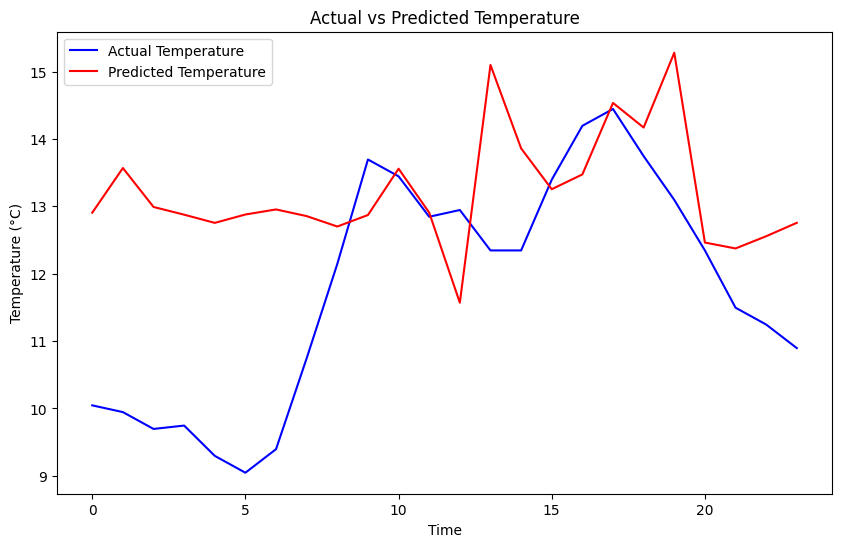

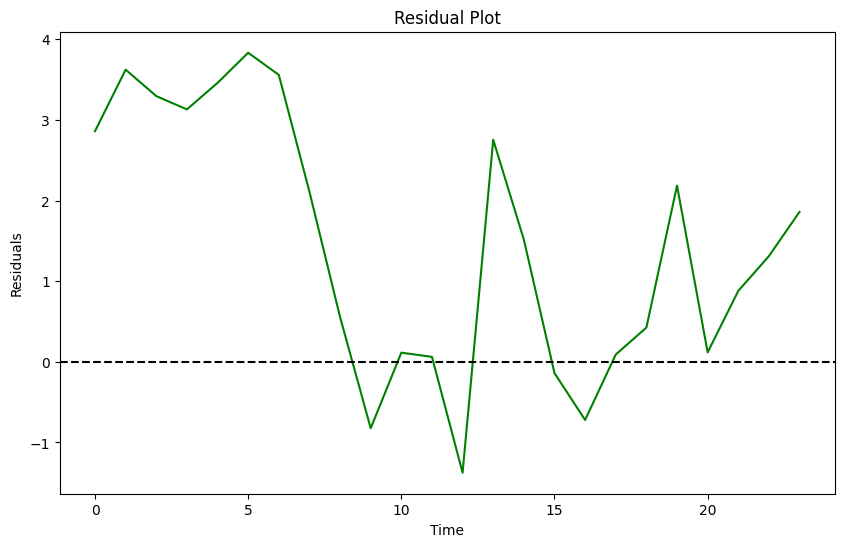

Mean Absolute Error (MAE): 1.69989009698232


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hourly_dataframe.index, hourly_dataframe['temperature_2m'], label='Actual Temperature', color='blue')
plt.plot(hourly_dataframe.index, output['max_temp'], label='Predicted Temperature', color='red')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()

residuals = output['max_temp'] - hourly_dataframe['temperature_2m']

plt.figure(figsize=(10, 6))
plt.plot(hourly_dataframe.index, residuals, color='green')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


mae = np.mean(np.abs(residuals))

print("Mean Absolute Error (MAE):", mae)


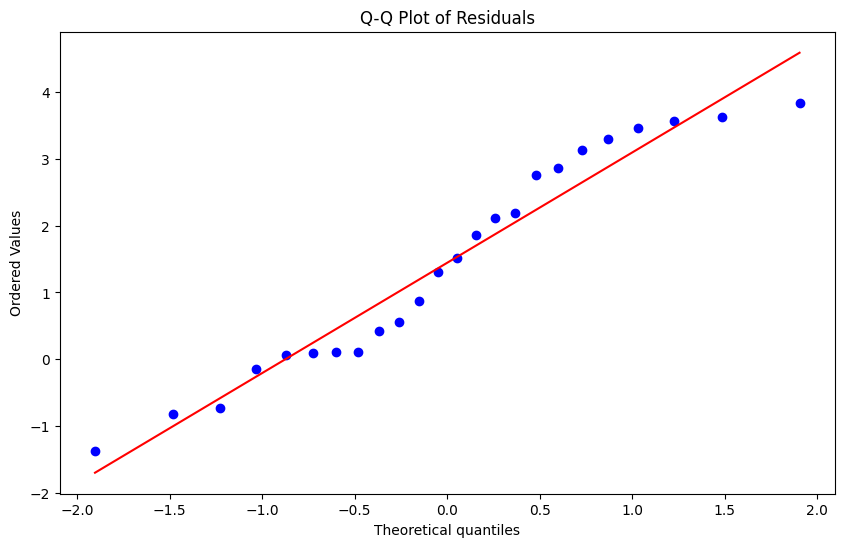

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [ ]:
correlation_coefficient = np.corrcoef(hourly_dataframe['temperature_2m'], output['max_temp'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.3644773043667267


Correlation Coefficient: 0.3644773043667267 implies a moderate correlation.

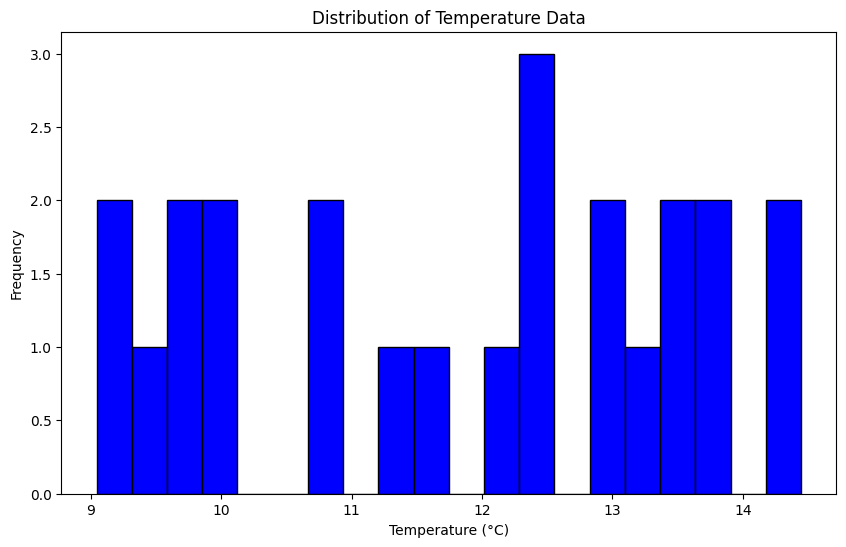

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(hourly_dataframe['temperature_2m'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature Data')
plt.show()
